In [32]:
from cylp.cy.CyClpSimplex import CyClpSimplex
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os
import re

In [33]:
series = "1"
mps_fldr = f"/Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_{series}"
mps_fldr_out = f"/Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_{series}_perturbed"

In [34]:
def get_obj_and_lp(path):
    objs = {}
    lps = {}
    for name in os.listdir(path):
        m = re.match(f"^obj_s{series}_i([0-9]+).mps$", name)
        if m:
            lp = CyClpSimplex()
            lp.extractCyLPModel(os.path.join(path, name))
            objs[int(m.group(1))] = lp.objectiveCoefficients.copy()
            lps[int(m.group(1))] = lp

    return objs, lps

In [35]:
variance = {1: .03, 3: .09, 5: .15, 10: .3}
def get_index(i):
    return list(variance.keys())[(i-2) % len(variance)]

In [36]:
objs, lps = get_obj_and_lp(mps_fldr)
for i in range(2, 51):
    v = variance[get_index(i)]
    perturbed_obj = objs[1]*np.random.uniform(1-v, 1+v, len(objs[1]))
    lps[i].objectiveCoefficients = perturbed_obj

1_perturbed/obj_s1_i47.mps in 0.002563 seconds
Coin0001I At line 1 NAME          obj_s1_i
Coin0001I At line 2 ROWS
Coin0001I At line 59 COLUMNS
Coin0001I At line 6900 RHS
Coin0001I At line 6929 BOUNDS
Coin0001I At line 7290 ENDATA
Coin0002I Problem obj_s1_i has 55 rows, 360 columns and 13200 elements
Clp0027I Model was imported from /Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_1_perturbed/obj_s1_i45.mps in 0.002512 seconds
Coin0001I At line 1 NAME          obj_s1_i
Coin0001I At line 2 ROWS
Coin0001I At line 59 COLUMNS
Coin0001I At line 6900 RHS
Coin0001I At line 6929 BOUNDS
Coin0001I At line 7290 ENDATA
Coin0002I Problem obj_s1_i has 55 rows, 360 columns and 13200 elements
Clp0027I Model was imported from /Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_1_perturbed/obj_s1_i44.mps in 0.002523 seconds
Coin0001I At line 1 NAME          obj_s1_i
Coin0001I At line 2 ROWS
Coin0001I At line 59 COLUMN

In [37]:
for i in range(1, 51):
    lps[i].writeMps(f"{mps_fldr_out}/obj_s{series}_i{i if i >= 10 else '0'+str(i)}.mps")

In [38]:
def cos_theta(a, b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [39]:
objs, lps = get_obj_and_lp(mps_fldr_out)
heat_map = np.zeros((50, 50))
for i in range(1, 51):
    for j in range(1, 51):
        heat_map[i-1, j-1] = cos_theta(objs[i], objs[j])

 /Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_1/obj_s1_i37.mps in 0.002617 seconds
Coin0001I At line 1 NAME        obj_s1_i23
Coin0001I At line 2 ROWS
Coin0001I At line 59 COLUMNS
Coin0001I At line 6902 RHS
Coin0001I At line 6931 BOUNDS
Coin0001I At line 7292 ENDATA
Coin0002I Problem obj_s1_i23 has 55 rows, 360 columns and 13200 elements
Clp0027I Model was imported from /Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_1/obj_s1_i23.mps in 0.002628 seconds
Coin0001I At line 1 NAME        obj_s1_i22
Coin0001I At line 2 ROWS
Coin0001I At line 59 COLUMNS
Coin0001I At line 6902 RHS
Coin0001I At line 6931 BOUNDS
Coin0001I At line 7292 ENDATA
Coin0002I Problem obj_s1_i22 has 55 rows, 360 columns and 13200 elements
Clp0027I Model was imported from /Users/sean/Documents/school/phd/research/warm_starting/vws/src/test/datasets/vary_obj/series_1/obj_s1_i22.mps in 0.002611 seconds
Coin0001I At line 1 NAME  

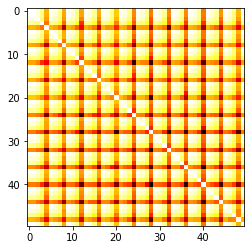

<Figure size 432x288 with 0 Axes>

In [40]:
plt.imshow(heat_map, cmap='hot', interpolation='nearest')
plt.show()
plt.savefig(f"heat_map_obj_series_{series}.png")

In [41]:
diff = {i: [math.degrees(math.acos(heat_map[i, 0])), 0 if i < 5 else get_index(i+1)] for i in range(0, 50)}
diff_df = pd.DataFrame.from_dict(diff, orient="index", columns=['nearest objective angle', 'intended angle'])
diff_df.to_csv(f"nearest_objective_angles/obj_series_{series}_perturbed.csv", index=False)

In [42]:
diff

{0: [0.0, 0],
 1: [0.9740506363123764, 0],
 2: [2.8338997167320534, 0],
 3: [4.992949285026122, 0],
 4: [9.236907882396146, 0],
 5: [0.9672602898532259, 1],
 6: [2.9762072820222167, 3],
 7: [4.892033820971982, 5],
 8: [9.425476804108138, 10],
 9: [1.0181487390787207, 1],
 10: [3.035506961685739, 3],
 11: [5.329664160446382, 5],
 12: [9.575387435583846, 10],
 13: [1.0086391810200825, 1],
 14: [2.9135483501317294, 3],
 15: [4.948696071092297, 5],
 16: [9.365133892980813, 10],
 17: [0.9476961776576336, 1],
 18: [3.1406193119802794, 3],
 19: [4.909209553895926, 5],
 20: [8.813319435393913, 10],
 21: [1.0184787720791695, 1],
 22: [3.0912433424573447, 3],
 23: [4.895031982471333, 5],
 24: [10.030152798500135, 10],
 25: [0.9516754772587828, 1],
 26: [3.0137971408080877, 3],
 27: [5.029703441662124, 5],
 28: [10.31959596314876, 10],
 29: [1.0049608976877946, 1],
 30: [2.819867320039266, 3],
 31: [4.899051825854105, 5],
 32: [10.079803620824302, 10],
 33: [1.0060662822251254, 1],
 34: [2.840292